# EDA

## 데이터 확인
data 에 있는 파일을 random 9(3x3)개 씩 확인해 보기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import random

In [2]:
# CSV 파일 경로
train_csv_path = '../data/train_correct_labeling.csv'
meta_csv_path = '../data/meta.csv'

# 데이터 폴더 경로
image_folder_path = '../data/train/'

# CSV 파일 읽기
train_df = pd.read_csv(train_csv_path)
meta_df = pd.read_csv(meta_csv_path)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1570 non-null   object
 1   target  1570 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.7+ KB


In [4]:
train_df.head()

,ID,target
0,002f99746285dfdd.jpg,16
1,008ccd231e1fea5d.jpg,10
2,008f5911bfda7695.jpg,10
3,009235e4c9c07af5.jpg,4
4,00b2f44967580c74.jpg,16


In [5]:
meta_df.head()

,target,class_name
0,0,account_number
1,1,application_for_payment_of_pregnancy_medical_e...
2,2,car_dashboard
3,3,confirmation_of_admission_and_discharge
4,4,diagnosis


In [3]:
# 데이터 구조 확인
print("Train CSV Columns:", train_df.columns)
print("Meta CSV Columns:", meta_df.columns)

# 예시 데이터 확인
print("Train Data Sample:\n", train_df.head())
print("Meta Data Sample:\n", meta_df.head())

Train CSV Columns: Index(['ID', 'target'], dtype='object')
Meta CSV Columns: Index(['target', 'class_name'], dtype='object')
Train Data Sample:
                      ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16
Meta Data Sample:
    target                                         class_name
0       0                                     account_number
1       1  application_for_payment_of_pregnancy_medical_e...
2       2                                      car_dashboard
3       3            confirmation_of_admission_and_discharge
4       4                                          diagnosis


In [4]:
# 'target'과 'class_name'을 매핑하는 딕셔너리 생성
target_to_classname = dict(zip(meta_df['target'], meta_df['class_name']))

# 이미지 파일명과 분류 코드 가져오기
image_files = train_df['ID']
labels = train_df['target']

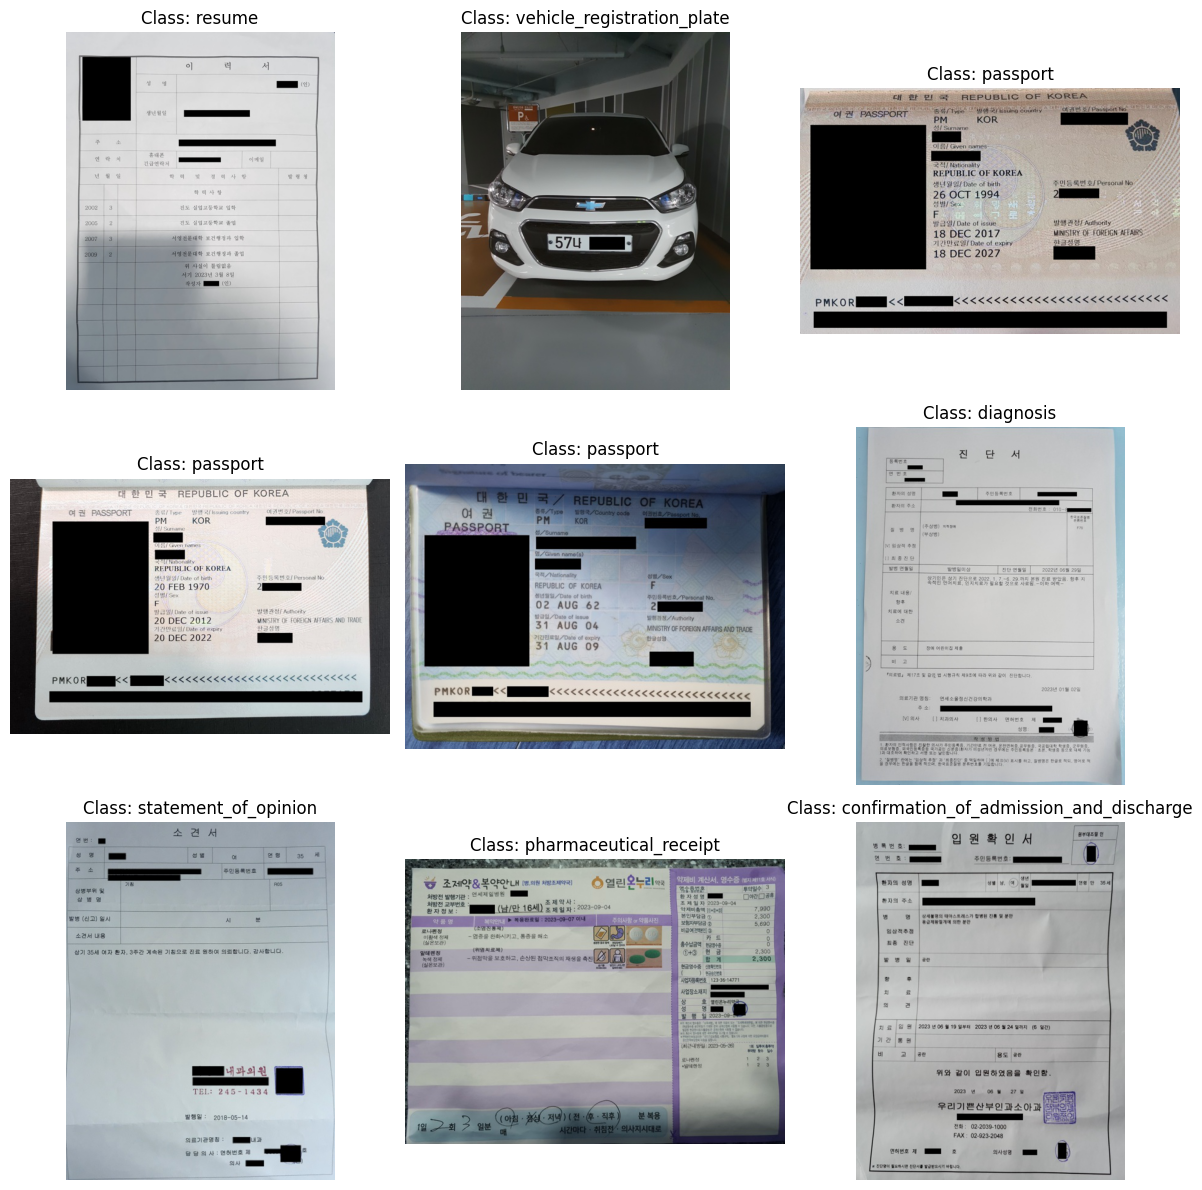

In [5]:
# 랜덤하게 9개의 인덱스 선택
num_images = 9
random_indices = random.sample(range(len(image_files)), num_images)
# 이미지와 라벨 시각화
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for i, idx in enumerate(random_indices):
    # 이미지 파일 경로
    image_path = os.path.join(image_folder_path, image_files[idx])
    
    # 이미지 열기
    img = Image.open(image_path)
    
    # 이미지 시각화
    row = i // 3
    col = i % 3
    axes[row, col].imshow(img)
    axes[row, col].axis('off')
    # 분류 코드에서 클래스 이름으로 변환하여 표시
    class_name = target_to_classname[labels[idx]]
    axes[row, col].set_title(f"Class: {class_name}")

plt.tight_layout()
plt.show()

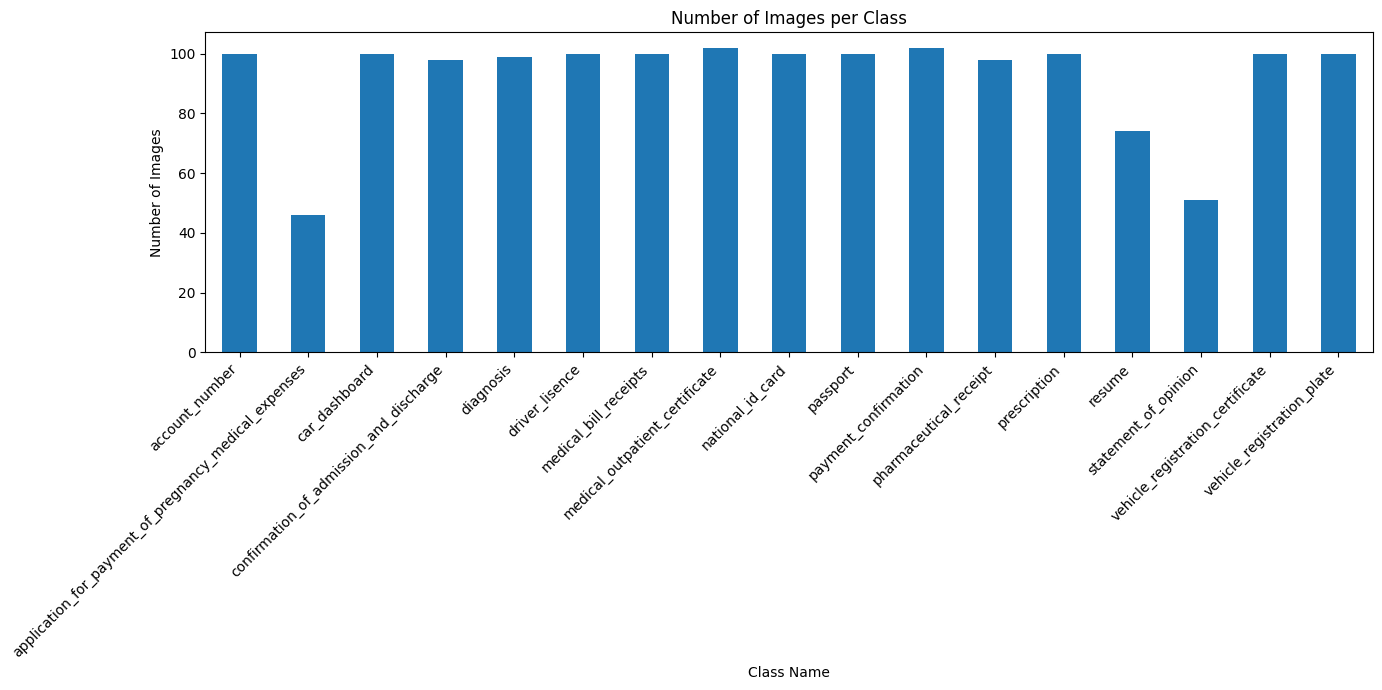

In [6]:
# 클래스 이름을 가진 데이터프레임 생성
train_df['class_name'] = train_df['target'].map(target_to_classname)

# 클래스별 이미지 수 계산
class_counts = train_df['class_name'].value_counts().sort_index()

# 막대 그래프 시각화
plt.figure(figsize=(14, 7))
class_counts.plot(kind='bar')
plt.title('Number of Images per Class')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 이미지 확인 코드

In [10]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# 이미지 인덱스 초기화 (범위: 943 ~ 1256)
current_index = widgets.IntText(value=248, description='Index:')

# '다음' 버튼 생성
button = widgets.Button(description="Next Image")

# 이미지를 표시할 Output 위젯 생성
image_output = widgets.Output()

# 이미지와 라벨 시각화 함수
def show_image(index):
    # 이전 출력 지우기
    image_output.clear_output(wait=True)
    
    # 인덱스가 범위 내에 있는지 확인
    # if index < 248 or index > 1256:
    #     with image_output:
    #         print("Index out of range. Please enter an index between 943 and 1256.")
    #     return
    
    # 이미지 경로와 클래스 이름 가져오기
    image_path = os.path.join(image_folder_path, image_files[index])
    class_name = target_to_classname[labels[index]]
    
    # 이미지 열기
    img = Image.open(image_path)
    
    # 이미지 시각화
    with image_output:
        plt.figure(figsize=(10, 10))  # 이미지를 크게 표시
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Class: {class_name}")
        plt.show()

# 버튼 클릭 이벤트 핸들러
def on_button_clicked(b):
    current_index.value += 1
    if current_index.value > 1256:
        current_index.value = 1  # 리스트의 끝에 도달하면 처음으로
    show_image(current_index.value)

# 버튼 클릭 이벤트 연결
button.on_click(on_button_clicked)

# 버튼과 인덱스 위젯을 수평으로 정렬
controls = widgets.HBox([button, current_index])

# 컨트롤과 이미지 출력을 수직으로 정렬
ui = widgets.VBox([controls, image_output])

# UI 표시
display(ui)

# 처음 이미지 표시
show_image(current_index.value)

# OCR Test

In [7]:
import cv2
import numpy as np
import os
import re
import logging
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from PIL import Image
from paddleocr import PaddleOCR
import gc

# PaddleOCR의 로깅 레벨을 ERROR로 설정하여 디버그 메시지 숨기기
logging.getLogger("paddleocr").setLevel(logging.ERROR)

# PaddleOCR 초기화
ocr = PaddleOCR(use_angle_cls=True, lang="korean", use_gpu=False, show_log=False)

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

def segment_image(image_path):
    image = preprocess_image(image_path)
    if image is None:
        return []
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [(image[y:y+h, x:x+w], (x, y, w, h)) 
            for contour in contours 
            for x, y, w, h in [cv2.boundingRect(contour)] 
            if w > 30 and h > 30]

def extract_text_from_segments(image_path, segments):
    original_image = cv2.imread(image_path)
    if original_image is None:
        return ""
    texts = []
    for segment, (x, y, w, h) in segments:
        roi = original_image[y:y+h, x:x+w]
        if roi.size == 0:
            continue
        result = ocr.ocr(roi, cls=True)
        texts.extend(item[1][0] for line in result if line for item in line if isinstance(item, list) and len(item) > 1)
    return ' '.join(texts)

def post_process_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\w\s.?!,]', '', text)
    return re.sub(r'\.{2,}', '.', text)

def process_image(img_path):
    segments = segment_image(img_path)
    if not segments:
        return "", 0, []
    text = extract_text_from_segments(img_path, segments)
    text = post_process_text(text)
    word_count = len(text.split())
    return text, word_count, segments

# UI 관련 위젯 초기화
current_index = widgets.IntText(value=0, description='Index:')
button = widgets.Button(description="Next Image")
status_label = widgets.Label(value="Ready")
image_output = widgets.Output()

processing = False

def show_image(index):
    global processing
    if processing:
        return

    processing = True
    status_label.value = "Processing..."
    button.disabled = True

    image_output.clear_output(wait=True)
    image_folder_path = '../data/train'
    image_files = sorted([f for f in os.listdir(image_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    
    if index < 0 or index >= len(image_files):
        with image_output:
            print("Index out of range. Please enter a valid index.")
        processing = False
        status_label.value = "Ready"
        button.disabled = False
        return
    
    image_path = os.path.join(image_folder_path, image_files[index])
    
    try:
        img = Image.open(image_path)
    except Exception as e:
        with image_output:
            print(f"Error opening image {image_path}: {str(e)}")
        processing = False
        status_label.value = "Ready"
        button.disabled = False
        return

    text, word_count, segments = process_image(image_path)
    
    with image_output:
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Original Image")
        plt.show()
        
        for i, (segment, (x, y, w, h)) in enumerate(segments):
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.cvtColor(segment, cv2.COLOR_GRAY2RGB))
            plt.axis('off')
            plt.title(f"Segment {i+1}")
            plt.show()
            print(f"Extracted Text from Segment {i+1}: {extract_text_from_segments(image_path, [(segment, (x, y, w, h))])}")

        print(f"Overall Extracted Text: {text}")
        print(f"Word Count: {word_count}")

    # 메모리 최적화
    plt.close('all')
    img.close()
    del img
    gc.collect()

    processing = False
    status_label.value = "Ready"
    button.disabled = False

def on_button_clicked(b):
    if not processing:
        current_index.value += 1
        show_image(current_index.value)

button.on_click(on_button_clicked)

controls = widgets.HBox([button, current_index, status_label])
ui = widgets.VBox([controls, image_output])

display(ui)
show_image(current_index.value)

## 전체 이미지 적용

# OCR 을 위한 이미지 증강
- 테스트 데이터에서 OCR 성능을 높이기 위한 전처리 기법 적용

In [5]:
import cv2
import numpy as np
import os
import re
import logging
from paddleocr import PaddleOCR
import pandas as pd
import gc
from tqdm import tqdm

# PaddleOCR의 로깅 레벨을 ERROR로 설정하여 디버그 메시지 숨기기
logging.getLogger("paddleocr").setLevel(logging.ERROR)

# PaddleOCR 초기화
ocr = PaddleOCR(use_angle_cls=True, lang="korean", use_gpu=False, show_log=False)

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    
    # 밝기 및 대비 조정
    image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)
    
    # 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 노이즈 제거
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    
    # CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(denoised)
    
    # 가우시안 블러 적용
    blurred = cv2.GaussianBlur(enhanced, (5, 5), 0)
    
    # 엣지 검출 (Canny)
    edged = cv2.Canny(blurred, 50, 200, apertureSize=3)
    
    # 이진화 (Otsu's Thresholding)
    _, binary_image = cv2.threshold(edged, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # 확장 및 침식 (Dilation and Erosion)
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(binary_image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)
    
    return eroded

def segment_image(image_path):
    image = preprocess_image(image_path)
    if image is None:
        return []
    
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [(image[y:y+h, x:x+w], (x, y, w, h)) 
            for contour in contours 
            for x, y, w, h in [cv2.boundingRect(contour)] 
            if w > 10 and h > 10]

def extract_text_from_segments(image_path, segments):
    original_image = cv2.imread(image_path)
    if original_image is None:
        return ""
    
    texts = []
    for segment, (x, y, w, h) in segments:
        roi = original_image[y:y+h, x:x+w]
        if roi.size == 0:
            continue
        
        result = ocr.ocr(roi, cls=True)
        texts.extend(item[1][0] for line in result if line for item in line if isinstance(item, list) and len(item) > 1)
    
    return ' '.join(texts)

def post_process_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\w\s.?!,]', '', text)
    return re.sub(r'\.{2,}', '.', text)

def process_image(img_path):
    segments = segment_image(img_path)
    if not segments:
        return ""
    
    text = extract_text_from_segments(img_path, segments)
    text = post_process_text(text)
    
    return text

def process_all_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    data = []
    
    for i, image_file in enumerate(tqdm(image_files, desc="Processing images")):
        image_path = os.path.join(folder_path, image_file)
        text = process_image(image_path)
        words = text.split()
        
        data.append({
            'id': i,
            'image': image_file,
            'texts': words
        })
        
        print(f"\nProcessed image {i+1}/{len(image_files)}: {image_file}")
        print(f"Extracted words: {', '.join(words[:10])}{'...' if len(words) > 10 else ''}")
        
        # 메모리 최적화
        gc.collect()
    
    return pd.DataFrame(data)

# 메인 실행 코드
if __name__ == "__main__":
    image_folder_path = '../data/train'  # 평가 이미지 폴더 경로
    output_csv_path = 'train_texts_2.csv'  # 평가 CSV 파일 
    
    print("Starting image processing...")
    df = process_all_images(image_folder_path)
    
    print("\nSaving results to CSV...")
    df.to_csv(output_csv_path, index=False, encoding='utf-8-sig')
    
    print(f"\nProcessing complete. Results saved to {output_csv_path}")
    print(f"Total images processed: {len(df)}")
    print(f"Total words extracted: {sum(df['texts'].apply(len))}")


Processing images:  95%|█████████▍| 1487/1570 [57:08<06:02,  4.37s/it]


Processed image 1487/1570: 51807e423fc0a50b.jpg
Extracted words: 4검사유효기간, 10045201F0부, 0A0료, 200, 트주의사항, 상탕첫복립에는, 신규동목입음, 먹습너다, 버고, 자동차슬고파카겨부가세제회...


Processing images:  95%|█████████▍| 1488/1570 [57:10<04:41,  3.44s/it]


Processed image 1488/1570: 1b60fba7141b8b33.jpg
Extracted words: 갸품사진, 만먹05, 미금대, 막제비계


Processing images:  95%|█████████▍| 1489/1570 [57:11<03:45,  2.79s/it]


Processed image 1489/1570: 9f9456c5f30ede0a.jpg
Extracted words: 12, 2, 1산시장

Processed image 1490/1570: fb70357d03187bf2.jpg
Extracted words: 


Processing images:  95%|█████████▍| 1491/1570 [57:18<04:40,  3.55s/it]


Processed image 1491/1570: c31be94e5376afae.jpg
Extracted words: 궁교글, 8040, 3100, 56, 처, 방, 전, 리의료보호, 무래구터, 신자돔차보힘...


Processing images:  95%|█████████▌| 1492/1570 [57:22<04:34,  3.52s/it]


Processed image 1492/1570: 26b5a257eea69adb.jpg
Extracted words: TY, EH, 조직기증, 8306202, 국류로을, YYH, YR로, 20270101, 기, 간...


Processing images:  95%|█████████▌| 1493/1570 [57:31<06:47,  5.29s/it]


Processed image 1493/1570: 4a5dfe6fe1ba552b.jpg
Extracted words: 물사가는, 주개디저망고복의니상는자상가, 자동차등록증, 회초붕부일, 보니미ROUATA!, 항색회엄식, YRE드GAAL, 보대HER1EE, 원로기럽스관, R1PFr...


Processing images:  95%|█████████▌| 1494/1570 [57:32<04:58,  3.92s/it]


Processed image 1494/1570: edd68ccff7032f5e.jpg
Extracted words: 경기도, 성남시


Processing images:  95%|█████████▌| 1495/1570 [57:32<03:36,  2.89s/it]


Processed image 1495/1570: 8b93c5f46f697d71.jpg
Extracted words: 


Processing images:  95%|█████████▌| 1496/1570 [57:34<02:55,  2.37s/it]


Processed image 1496/1570: 4334b08d1c84cd7d.jpg
Extracted words: 타인하시기바람너다, 무회사평, 몰


Processing images:  95%|█████████▌| 1497/1570 [57:35<02:27,  2.02s/it]


Processed image 1497/1570: e8c0c381c02201c9.jpg
Extracted words: 원수입수, 02, 100, 10, 약야궁금한기면, 의약품, 감색살4P작


Processing images:  95%|█████████▌| 1498/1570 [57:36<02:10,  1.81s/it]


Processed image 1498/1570: 1247240e60498c2f.jpg
Extracted words: 청장, 주민등록증, 7510082, 인천광역시, 동구, 1999, 9, 15, 동구청장


Processing images:  95%|█████████▌| 1499/1570 [57:40<03:01,  2.56s/it]


Processed image 1499/1570: 9b99cecf50af090a.jpg
Extracted words: 국민건강보험공단, 이사장, 예라, 시모신춘신회료는, 습산, 차는동문, 엄신환인임, 어루부터기재, 선불이, 韓다매아...


Processing images:  96%|█████████▌| 1500/1570 [57:41<02:16,  1.95s/it]


Processed image 1500/1570: f48bfe5c8b9948b4.jpg
Extracted words: 

Processed image 1501/1570: 8ae19d84e8e620fa.jpg
Extracted words: 


Processing images:  96%|█████████▌| 1502/1570 [57:42<01:15,  1.11s/it]


Processed image 1502/1570: 957a9861a894c253.jpg
Extracted words: 


Processing images:  96%|█████████▌| 1503/1570 [57:42<01:04,  1.04it/s]


Processed image 1503/1570: 6d5dad8f246c0ecb.jpg
Extracted words: 31저


Processing images:  96%|█████████▌| 1504/1570 [57:48<02:34,  2.35s/it]


Processed image 1504/1570: 951c10babfef1ce7.jpg
Extracted words: 시개기무호서색, 한자번호, 00027643, 본인, 처, 전, 러코보호, 산재보험, 메자동차보템, 5개타...


Processing images:  96%|█████████▌| 1505/1570 [57:48<01:55,  1.78s/it]


Processed image 1505/1570: 768545ba7f6fd580.jpg
Extracted words: 


Processing images:  96%|█████████▌| 1506/1570 [57:54<03:03,  2.87s/it]


Processed image 1506/1570: 71dde89e294555fc.jpg
Extracted words: 주민동목변호, 친, 단, 동목변호, 면법도, 아주, 국무, 주민동목변로, 하지의, 주술...


Processing images:  96%|█████████▌| 1507/1570 [57:58<03:24,  3.24s/it]


Processed image 1507/1570: 3d37e6b01e0cde9d.jpg
Extracted words: 무다매어, 무타해아, 2000년0113할, 12372803, 피멘, 세또는에, 게, 견화변호, 주입신을산복엔구, 무대미구분...


Processing images:  96%|█████████▌| 1508/1570 [57:58<02:27,  2.38s/it]


Processed image 1508/1570: 04320d1d34f005ca.jpg
Extracted words: 


Processing images:  96%|█████████▌| 1509/1570 [58:02<02:58,  2.92s/it]


Processed image 1509/1570: dac2e72086a27f34.jpg
Extracted words: 쿄복교국, 료보힘, 호의르보흥, 무산재보험, 역자동차보험, 리, 912교2품건, 3410001E, 년3, 법15일드...


Processing images:  96%|█████████▌| 1510/1570 [58:03<02:13,  2.23s/it]


Processed image 1510/1570: 7e99488642b706df.jpg
Extracted words: 


Processing images:  96%|█████████▌| 1511/1570 [58:04<01:50,  1.87s/it]


Processed image 1511/1570: 638449335fbd1759.jpg
Extracted words: 10125, 미1, 0, 조제시진고시당, 구분기로, 교, 2023년01월

Processed image 1512/1570: 2fef62c132543794.jpg
Extracted words: 


Processing images:  96%|█████████▋| 1513/1570 [58:06<01:30,  1.59s/it]


Processed image 1513/1570: 8189f3a50f102070.jpg
Extracted words: 6, 230, 260, 30t, 350, 1000, rp1, 35m!, 120, 40...


Processing images:  96%|█████████▋| 1514/1570 [58:08<01:35,  1.71s/it]


Processed image 1514/1570: 13c183761855c4e6.jpg
Extracted words: 모근, 19225, K, 모근, 그급도, 크, 31901, 더, 79225, K


Processing images:  96%|█████████▋| 1515/1570 [58:17<03:24,  3.72s/it]


Processed image 1515/1570: 9588b457eec4ae20.jpg
Extracted words: 구가복의대라교의료, 저, 1마악, 향정신성의약, 환자, 보관용, 공려문교, 의료금어, 자동차보험, 기타...


Processing images:  97%|█████████▋| 1516/1570 [58:18<02:38,  2.94s/it]


Processed image 1516/1570: ebd978302b4de8c5.jpg
Extracted words: 지OR, 금, 구풍, PASSPORT, PKOR


Processing images:  97%|█████████▋| 1517/1570 [58:22<03:02,  3.44s/it]


Processed image 1517/1570: 228baafd60ceaae0.jpg
Extracted words: 김사휴효기간, 19002, 0403, 23, 4부, T62, 3매, 주의사함디낭, 멋케, 난에는...


Processing images:  97%|█████████▋| 1518/1570 [58:23<02:19,  2.68s/it]


Processed image 1518/1570: 9bea7d9dc1ce362b.jpg
Extracted words: 가살, 문, 연정, 병분류번, 023051

Processed image 1519/1570: 1ff90f5c563641b6.jpg
Extracted words: 


Processing images:  97%|█████████▋| 1520/1570 [58:24<01:15,  1.51s/it]


Processed image 1520/1570: fa6d6811b624d725.jpg
Extracted words: 


Processing images:  97%|█████████▋| 1521/1570 [58:27<01:38,  2.02s/it]


Processed image 1521/1570: b28682210d4add0c.jpg
Extracted words: 주험, 거리, 18765, 120, 140, 100, 160, 8, 180, 60...


Processing images:  97%|█████████▋| 1522/1570 [58:32<02:08,  2.68s/it]


Processed image 1522/1570: 162759419a76edff.jpg
Extracted words: 400LDDODD0O3121E, 1050너, 고조망, 06정지층부, 20200703222207, 21회작, 주렌거격, H9, AhT, 티발음음인...


Processing images:  97%|█████████▋| 1523/1570 [58:38<02:53,  3.69s/it]


Processed image 1523/1570: 0716742e75cfcbbf.jpg
Extracted words: 호용궁동10농용을문용, 원부음물연탐, 탁인하시기비합너다, 잉구분정도는발소, 명일, 주냉면회유의사항, 검사유효기간, 피이z어수성기0z, 행주의사향상황첫제안에는, 풍늘음스...

Processed image 1524/1570: 48675735fa816fb9.jpg
Extracted words: 


Processing images:  97%|█████████▋| 1525/1570 [58:40<01:45,  2.34s/it]


Processed image 1525/1570: c766e48a1e3cc8d2.jpg
Extracted words: 무T6u091보P로R늘60금091S600512!, 루웨드, 리, 출라여야


Processing images:  97%|█████████▋| 1526/1570 [58:42<01:40,  2.28s/it]


Processed image 1526/1570: f4775a882a619874.jpg
Extracted words: 100, 120, 140, 60, 150, 40, 0, 20, 200, 220...


Processing images:  97%|█████████▋| 1527/1570 [58:42<01:13,  1.71s/it]


Processed image 1527/1570: ee44ae70132a1882.jpg
Extracted words: 


Processing images:  97%|█████████▋| 1528/1570 [58:45<01:26,  2.07s/it]


Processed image 1528/1570: 4035044548fcc3a8.jpg
Extracted words: 진료비계산서, 진, 료, 비계산서, 영, 수증, 무평금문, 선명박, 201410M08153, 귀하케서...


Processing images:  97%|█████████▋| 1529/1570 [58:46<01:12,  1.78s/it]


Processed image 1529/1570: 6c7c0ef5def29ad3.jpg
Extracted words: 7508262, 750826, 자동차운전면허증, Drivers!, License


Processing images:  97%|█████████▋| 1530/1570 [58:52<02:01,  3.04s/it]


Processed image 1530/1570: e55e2da78637ab9a.jpg
Extracted words: 접사유효기간, 경대초, 전대, 사료, 억자분거터, 명스유, 주회사함, 성함첫케난에는신, 어어보시기바랍니다, 자동차등록증...


Processing images:  98%|█████████▊| 1531/1570 [58:53<01:33,  2.40s/it]


Processed image 1531/1570: 1202c24bea56d1dc.jpg
Extracted words: 자동차운전면허증, Drivers, Li


Processing images:  98%|█████████▊| 1532/1570 [58:54<01:12,  1.91s/it]


Processed image 1532/1570: f9ebb85e2929b388.jpg
Extracted words: 69노, 69노


Processing images:  98%|█████████▊| 1533/1570 [58:55<00:59,  1.60s/it]


Processed image 1533/1570: 5a6b7f756b95da64.jpg
Extracted words: O0, _


Processing images:  98%|█████████▊| 1534/1570 [58:56<00:51,  1.43s/it]


Processed image 1534/1570: 30363ae8afb9f685.jpg
Extracted words: 주민등록증, 980722, 경상북도, 구미시, 2015, 11, 11, 경상북도, 구미시장


Processing images:  98%|█████████▊| 1535/1570 [58:58<00:59,  1.69s/it]


Processed image 1535/1570: 6fdb4b80ba1cfb7b.jpg
Extracted words: 동은, 2시간, 무료, 금일, 협연한자, 도시간, 무료, 교는, 무르, 겉로여회려수...


Processing images:  98%|█████████▊| 1536/1570 [58:58<00:44,  1.31s/it]


Processed image 1536/1570: be6311cc2841ba1f.jpg
Extracted words: 


Processing images:  98%|█████████▊| 1537/1570 [58:59<00:40,  1.22s/it]


Processed image 1537/1570: 4ddc51bca63ac1ff.jpg
Extracted words: 2, 교, 무


Processing images:  98%|█████████▊| 1538/1570 [59:01<00:44,  1.39s/it]


Processed image 1538/1570: 49a27cda7297e82d.jpg
Extracted words: 주민등록증, 8211141, 경상북도, 영주시, 2007, 8, 27, 경상북도, 영주시장


Processing images:  98%|█████████▊| 1539/1570 [59:02<00:33,  1.09s/it]


Processed image 1539/1570: 293316f2c9939133.jpg
Extracted words: 


Processing images:  98%|█████████▊| 1540/1570 [59:04<00:41,  1.39s/it]


Processed image 1540/1570: af650bfc45cb3c46.jpg
Extracted words: 일파지, 2교, 10분, 455, 지, 성, 모, 원, 필요하시면, 진단서될...


Processing images:  98%|█████████▊| 1541/1570 [59:04<00:31,  1.10s/it]


Processed image 1541/1570: 8ea17c5687d735b3.jpg
Extracted words: 


Processing images:  98%|█████████▊| 1542/1570 [59:04<00:24,  1.14it/s]


Processed image 1542/1570: 68ad00a3f2a7ecdb.jpg
Extracted words: 


Processing images:  98%|█████████▊| 1543/1570 [59:07<00:38,  1.44s/it]


Processed image 1543/1570: 25cb3d4a2e9d24e2.jpg
Extracted words: 허우공, 공음, 22동공, 려, 마무1무농금2동, 보험회사제출, 뭉위공탕, 위와, 같이, 棟입원중임...


Processing images:  98%|█████████▊| 1544/1570 [59:09<00:37,  1.45s/it]


Processed image 1544/1570: 81ca8f684b6aee30.jpg
Extracted words: 102, 20230730, H6T5, 원, 이마매


Processing images:  98%|█████████▊| 1545/1570 [59:13<01:00,  2.41s/it]


Processed image 1545/1570: e3a0e3c88dd2de8c.jpg
Extracted words: 대, 한, 안, 국, REPUBLIC, OF, KOREA, PASSPORT, 발염국비9시C0tTY, PM...


Processing images:  98%|█████████▊| 1546/1570 [59:14<00:46,  1.94s/it]


Processed image 1546/1570: bbb3c7c897a279c6.jpg
Extracted words: 가만대0, 9R17P, 2023년, 06월, 10밀


Processing images:  99%|█████████▊| 1547/1570 [59:19<01:02,  2.72s/it]


Processed image 1547/1570: 39f3daa7b06e4a99.jpg
Extracted words: 학국제출, 주덕료보험, 2외코보호, 안산재보험, 스차통차보, J26, 요양기관개호, 34100415, 변효, 주민...


Processing images:  99%|█████████▊| 1548/1570 [59:19<00:47,  2.14s/it]


Processed image 1548/1570: 5c4fa8be15d53311.jpg
Extracted words: 회효어는


Processing images:  99%|█████████▊| 1549/1570 [59:20<00:34,  1.63s/it]


Processed image 1549/1570: 32dc0bbace373001.jpg
Extracted words: 


Processing images:  99%|█████████▊| 1550/1570 [59:22<00:35,  1.79s/it]


Processed image 1550/1570: ff51dd281a8423f1.jpg
Extracted words: 상든, 컴막조금, 타날, 검두, 전문가와신, 가손모린령, 고, 여만, 61세, 024457070...


Processing images:  99%|█████████▉| 1551/1570 [59:23<00:30,  1.62s/it]


Processed image 1551/1570: ed5a4e5d317038eb.jpg
Extracted words: 주민등록증, 9111102, 경상북도예천군, 예친, 2017, 8, 14, 경상북도, 예천군수, 부스이


Processing images:  99%|█████████▉| 1552/1570 [59:24<00:23,  1.29s/it]


Processed image 1552/1570: 5f489ecf342e00d2.jpg
Extracted words: 상주시, 장회인


Processing images:  99%|█████████▉| 1553/1570 [59:27<00:33,  2.00s/it]


Processed image 1553/1570: c82e4e5709492578.jpg
Extracted words: 지요, 대, 한, 민, 국, REPUBLIC, OF, KOREA, PASSPORT, 종류자...


Processing images:  99%|█████████▉| 1554/1570 [59:28<00:24,  1.51s/it]


Processed image 1554/1570: ebbe01aaff327255.jpg
Extracted words: 


Processing images:  99%|█████████▉| 1555/1570 [59:28<00:17,  1.18s/it]


Processed image 1555/1570: c7d8b8df37ef1e65.jpg
Extracted words: 


Processing images:  99%|█████████▉| 1556/1570 [59:30<00:20,  1.48s/it]


Processed image 1556/1570: f45f490c82c43c39.jpg
Extracted words: 자동차운전면허준, DrivcrsIfcer, 2종보통, 자동차운전면허증, 1DrV르, 9708044?, 서울특별시동태문구, 면허, 20310101, 20311231...


Processing images:  99%|█████████▉| 1557/1570 [59:31<00:15,  1.16s/it]


Processed image 1557/1570: 5580a49957352133.jpg
Extracted words: 


Processing images:  99%|█████████▉| 1558/1570 [59:32<00:12,  1.06s/it]


Processed image 1558/1570: 9ba8f08db3fe2a4c.jpg
Extracted words: 서울특별시강동구


Processing images:  99%|█████████▉| 1559/1570 [59:33<00:11,  1.02s/it]


Processed image 1559/1570: a9c98518ff83cd43.jpg
Extracted words: I, P, OUT


Processing images:  99%|█████████▉| 1560/1570 [59:34<00:10,  1.07s/it]


Processed image 1560/1570: 485c7b00ac003324.jpg
Extracted words: 군, 680616, 자동자운전면허증, Drivers, Lice


Processing images:  99%|█████████▉| 1561/1570 [59:34<00:07,  1.14it/s]


Processed image 1561/1570: a57a6d43e90120d2.jpg
Extracted words: 60


Processing images:  99%|█████████▉| 1562/1570 [59:43<00:24,  3.12s/it]


Processed image 1562/1570: a4dafcbb175ac0e1.jpg
Extracted words: 계산서, 멈수중, 농눔유, 아침, 점심, 저녁전, 후, 지호, 3, 분복용...


Processing images: 100%|█████████▉| 1563/1570 [59:50<00:31,  4.56s/it]


Processed image 1563/1570: f91e11f9cf1fd712.jpg
Extracted words: 겸사유효기간, 2501, 1595, 14교, 45, 020020202518, 10분, 12EG006, 0디어회0학110, 부면...


Processing images: 100%|█████████▉| 1564/1570 [59:51<00:20,  3.35s/it]


Processed image 1564/1570: c85e690b7fe577ad.jpg
Extracted words: 나산범

Processed image 1565/1570: f7adaf5535c0ba79.jpg
Extracted words: 


Processing images: 100%|█████████▉| 1566/1570 [59:54<00:09,  2.38s/it]


Processed image 1566/1570: d9e230e42838eb4f.jpg
Extracted words: 위와, 같이, 동품운국물, 확안함, 시는, 염, 2023년01원17, 의료기관주소, 피료, 요양기파기호...


Processing images: 100%|█████████▉| 1567/1570 [59:54<00:05,  1.85s/it]


Processed image 1567/1570: 713c484c86197d5b.jpg
Extracted words: 48


Processing images: 100%|█████████▉| 1568/1570 [59:55<00:03,  1.67s/it]


Processed image 1568/1570: 9dcfef27d51c3e5e.jpg
Extracted words: 주민등록증, 7511202, 서울특별시, 관악구, 1999, 10, 12, 서울특별시, 요유는고


Processing images: 100%|█████████▉| 1569/1570 [59:56<00:01,  1.36s/it]


Processed image 1569/1570: 43965cc70d7d14e0.jpg
Extracted words: 게년권대


Processing images: 100%|██████████| 1570/1570 [1:00:03<00:00,  2.30s/it]


Processed image 1570/1570: b1dad2db5c2de2da.jpg
Extracted words: 커사음호기간, KFoe, 주의사항양할, 첫제, 단대는, 퍼습니다, 버고, 저당면, 풍목사거당군풍퓨의, 내물은...

Saving results to CSV...

Processing complete. Results saved to train_texts_2.csv
Total images processed: 1570
Total words extracted: 23660


## test 데이터를 위한 다양한 반전 / 회전 기타 전치리를 통한 글자 인식(OCR)

In [ ]:
import cv2
import numpy as np
import os
import re
import logging
from paddleocr import PaddleOCR
import pandas as pd
import gc
from tqdm import tqdm

# PaddleOCR의 로깅 레벨을 ERROR로 설정하여 디버그 메시지 숨기기
logging.getLogger("paddleocr").setLevel(logging.ERROR)

# PaddleOCR 초기화
ocr = PaddleOCR(use_angle_cls=True, lang="korean", use_gpu=False, show_log=False)

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    
    # 밝기 및 대비 조정
    image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)
    
    # 그레이스케일로 변환
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 노이즈 제거
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    
    # CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(denoised)
    
    # Adaptive Thresholding
    adaptive_thresh = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
    # Morphological Transformations (열림과 닫힘)
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(adaptive_thresh, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    
    # Deskewing
    coords = np.column_stack(np.where(closing > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = closing.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed = cv2.warpAffine(closing, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return deskewed

def segment_image(image_path):
    image = preprocess_image(image_path)
    if image is None:
        return []
    
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [(image[y:y+h, x:x+w], (x, y, w, h)) 
            for contour in contours 
            for x, y, w, h in [cv2.boundingRect(contour)] 
            if w > 10 and h > 10]

def extract_text_from_segments(image_path, segments):
    original_image = cv2.imread(image_path)
    if original_image is None:
        return ""
    
    angles = [0, 45, 90, 135, 180, 225, 270, 315]
    flips = [None, 0, 1, -1]
    texts = []

    for angle in angles:
        rotated_image = rotate_image(original_image, angle)
        for flip in flips:
            if flip is not None:
                flipped_image = cv2.flip(rotated_image, flip)
            else:
                flipped_image = rotated_image

            for segment, (x, y, w, h) in segments:
                roi = flipped_image[y:y+h, x:x+w]
                if roi.size == 0:
                    continue
                
                result = ocr.ocr(roi, cls=True)
                texts.extend(item[1][0] for line in result if line for item in line if isinstance(item, list) and len(item) > 1)
    
    return ' '.join(texts)

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def post_process_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\w\s.?!,]', '', text)
    return re.sub(r'\.{2,}', '.', text)

def process_image(img_path):
    segments = segment_image(img_path)
    if not segments:
        return ""
    
    text = extract_text_from_segments(img_path, segments)
    text = post_process_text(text)
    
    return text

def process_all_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    data = []
    
    for i, image_file in enumerate(tqdm(image_files, desc="Processing images")):
        image_path = os.path.join(folder_path, image_file)
        text = process_image(image_path)
        words = text.split()
        
        data.append({
            'id': i,
            'image': image_file,
            'texts': words
        })
        
        print(f"\nProcessed image {i+1}/{len(image_files)}: {image_file}")
        print(f"Extracted words: {', '.join(words[:10])}{'...' if len(words) > 10 else ''}")
        
        # 메모리 최적화
        gc.collect()
    
    return pd.DataFrame(data)

# 메인 실행 코드
if __name__ == "__main__":
    image_folder_path = '../data/test'  # 평가 이미지 폴더 경로
    output_csv_path = 'test_texts_final.csv'  # 평가 CSV 파일 
    
    print("Starting image processing...")
    df = process_all_images(image_folder_path)
    
    print("\nSaving results to CSV...")
    df.to_csv(output_csv_path, index=False, encoding='utf-8-sig')
    
    print(f"\nProcessing complete. Results saved to {output_csv_path}")
    print(f"Total images processed: {len(df)}")
    print(f"Total words extracted: {sum(df['texts'].apply(len))}")


# PARSeq 모델을 활용한 OCR

## 단어 사전 이용

In [6]:
import cv2
import numpy as np
import os
import re
import logging
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
from PIL import Image
from paddleocr import PaddleOCR
import gc

# PaddleOCR의 로깅 레벨을 ERROR로 설정하여 디버그 메시지 숨기기
logging.getLogger("paddleocr").setLevel(logging.ERROR)

# PaddleOCR 초기화
ocr = PaddleOCR(use_angle_cls=True, lang="korean", use_gpu=False, show_log=False)

# 간단한 한글/영어 사전 (예시 사전)
dictionary = set(["예시", "사전", "단어", "목록", "example", "dictionary", "word", "list"])

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        return None
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(gray, None, 10, 7, 21)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    enhanced = clahe.apply(denoised)
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

def segment_image(image_path):
    image = preprocess_image(image_path)
    if image is None:
        return []
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return [(image[y:y+h, x:x+w], (x, y, w, h)) 
            for contour in contours 
            for x, y, w, h in [cv2.boundingRect(contour)] 
            if w > 30 and h > 30]

def extract_text_from_segments(image_path, segments):
    original_image = cv2.imread(image_path)
    if original_image is None:
        return ""
    texts = []
    for segment, (x, y, w, h) in segments:
        roi = original_image[y:y+h, x:x+w]
        if roi.size == 0:
            continue
        result = ocr.ocr(roi, cls=True)
        texts.extend(item[1][0] for line in result if line for item in line if isinstance(item, list) and len(item) > 1)
    return ' '.join(texts)

def post_process_text(text):
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\w\s.?!,]', '', text)
    return re.sub(r'\.{2,}', '.', text)

def filter_meaningful_words(text):
    words = text.split()
    meaningful_words = [word for word in words if word.lower() in dictionary]
    return ' '.join(meaningful_words)

def process_image(img_path):
    segments = segment_image(img_path)
    if not segments:
        return "", 0, [], ""
    text = extract_text_from_segments(img_path, segments)
    text = post_process_text(text)
    word_count = len(text.split())
    meaningful_text = filter_meaningful_words(text)
    return text, word_count, segments, meaningful_text

# UI 관련 위젯 초기화
current_index = widgets.IntText(value=0, description='Index:')
button = widgets.Button(description="Next Image")
status_label = widgets.Label(value="Ready")
image_output = widgets.Output()

processing = False

def show_image(index):
    global processing
    if processing:
        return

    processing = True
    status_label.value = "Processing..."
    button.disabled = True

    image_output.clear_output(wait=True)
    image_folder_path = '../data/train'
    image_files = sorted([f for f in os.listdir(image_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
    
    if index < 0 or index >= len(image_files):
        with image_output:
            print("Index out of range. Please enter a valid index.")
        processing = False
        status_label.value = "Ready"
        button.disabled = False
        return
    
    image_path = os.path.join(image_folder_path, image_files[index])
    
    try:
        img = Image.open(image_path)
    except Exception as e:
        with image_output:
            print(f"Error opening image {image_path}: {str(e)}")
        processing = False
        status_label.value = "Ready"
        button.disabled = False
        return

    text, word_count, segments, meaningful_text = process_image(image_path)
    
    with image_output:
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Original Image")
        plt.show()
        
        for i, (segment, (x, y, w, h)) in enumerate(segments):
            plt.figure(figsize=(5, 5))
            plt.imshow(cv2.cvtColor(segment, cv2.COLOR_GRAY2RGB))
            plt.axis('off')
            plt.title(f"Segment {i+1}")
            plt.show()
            print(f"Extracted Text from Segment {i+1}: {extract_text_from_segments(image_path, [(segment, (x, y, w, h))])}")

        print(f"Overall Extracted Text: {text}")
        print(f"Word Count: {word_count}")
        print(f"Meaningful Words: {meaningful_text}")

    # 메모리 최적화
    plt.close('all')
    img.close()
    del img
    gc.collect()

    processing = False
    status_label.value = "Ready"
    button.disabled = False

def on_button_clicked(b):
    if not processing:
        current_index.value += 1
        show_image(current_index.value)

button.on_click(on_button_clicked)

controls = widgets.HBox([button, current_index, status_label])
ui = widgets.VBox([controls, image_output])

display(ui)
show_image(current_index.value)


# 이미지 분석

In [8]:
def analyze_image_sizes(csv_path, image_folder_path):
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)
    
    # 이미지 크기 저장을 위한 리스트
    widths = []
    heights = []
    
    # CSV 파일의 첫 번째 열을 이미지 파일명으로 가정
    image_column = df.columns[0]
    
    # 모든 이미지의 크기 수집
    for image_file in df[image_column]:
        image_path = os.path.join(image_folder_path, image_file)
        try:
            with Image.open(image_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
        except Exception as e:
            print(f"Error loading {image_file}: {e}")
    
    # 이미지 크기 데이터프레임 생성
    return pd.DataFrame({'Width': widths, 'Height': heights})

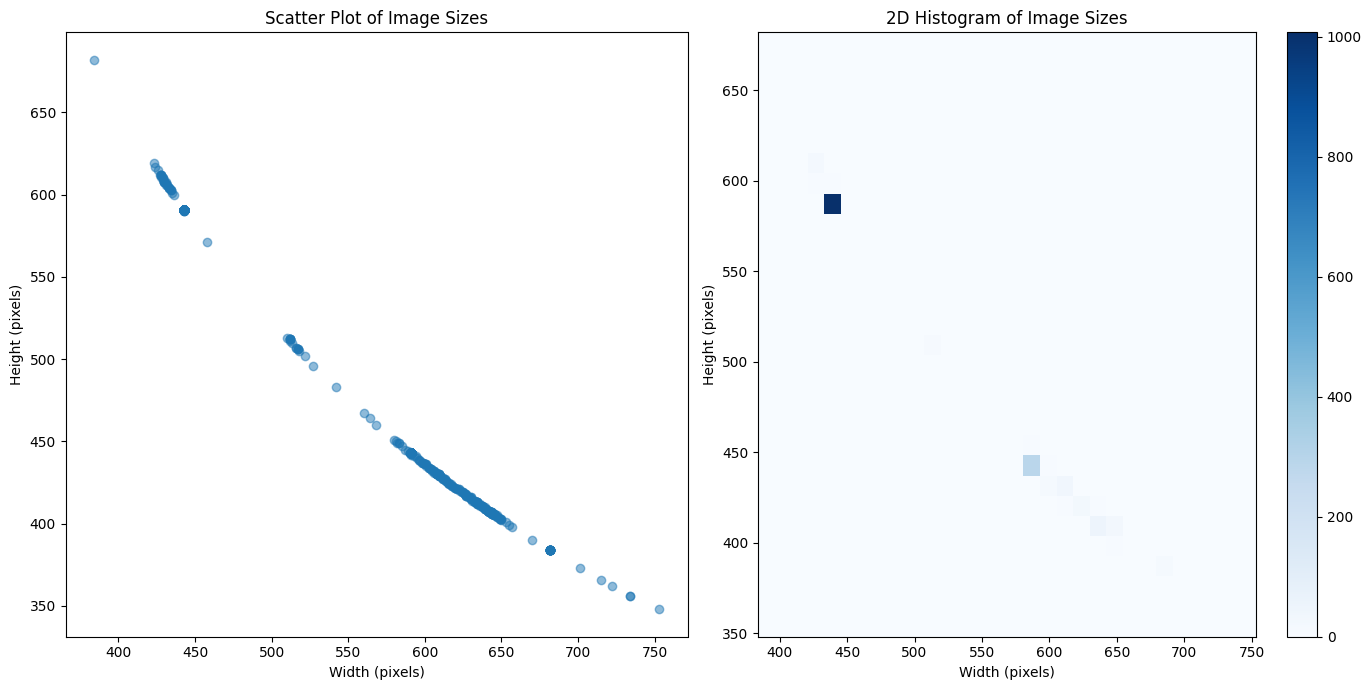

Image Size Statistics:
             Width       Height
count  1570.000000  1570.000000
mean    497.613376   538.169427
std      79.370316    76.074772
min     384.000000   348.000000
25%     443.000000   443.000000
50%     443.000000   591.000000
75%     591.000000   591.000000
max     753.000000   682.000000

Image with the largest width:
Width: 753 pixels, Height: 348 pixels

Image with the largest height:
Width: 384 pixels, Height: 682 pixels

Image with the largest area:
Width: 512 pixels, Height: 512 pixels
Area: 262144 square pixels

Image Width Distribution:
Width
384    1
423    1
424    1
426    1
427    1
      ..
701    1
715    1
722    1
734    2
753    1
Name: count, Length: 102, dtype: int64

Image Height Distribution:
Height
348    1
356    2
362    1
366    1
373    1
      ..
612    5
615    1
617    1
619    1
682    1
Name: count, Length: 89, dtype: int64


In [9]:
image_folder_path = '../data/train/'
test_csv_path = '../data/train_correct_labeling.csv'

# 이미지 크기 분석
image_sizes = analyze_image_sizes(test_csv_path, image_folder_path)

# 이미지 크기 시각화
plt.figure(figsize=(14, 7))

# 산점도
plt.subplot(1, 2, 1)
plt.scatter(image_sizes['Width'], image_sizes['Height'], alpha=0.5)
plt.title('Scatter Plot of Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

# 히스토그램
plt.subplot(1, 2, 2)
plt.hist2d(image_sizes['Width'], image_sizes['Height'], bins=30, cmap='Blues')
plt.colorbar()
plt.title('2D Histogram of Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()

# 기본 통계 출력
print("Image Size Statistics:")
print(image_sizes.describe())

# 가장 큰 width, height, area를 가진 이미지 찾기
max_width_image = image_sizes.loc[image_sizes['Width'].idxmax()]
max_height_image = image_sizes.loc[image_sizes['Height'].idxmax()]
image_sizes['Area'] = image_sizes['Width'] * image_sizes['Height']
max_area_image = image_sizes.loc[image_sizes['Area'].idxmax()]

print("\nImage with the largest width:")
print(f"Width: {max_width_image['Width']} pixels, Height: {max_width_image['Height']} pixels")

print("\nImage with the largest height:")
print(f"Width: {max_height_image['Width']} pixels, Height: {max_height_image['Height']} pixels")

print("\nImage with the largest area:")
print(f"Width: {max_area_image['Width']} pixels, Height: {max_area_image['Height']} pixels")
print(f"Area: {max_area_image['Area']} square pixels")

# 이미지 크기 분포 출력
print("\nImage Width Distribution:")
print(image_sizes['Width'].value_counts().sort_index())
print("\nImage Height Distribution:")
print(image_sizes['Height'].value_counts().sort_index())

Image Size Statistics:
             Width       Height
count  3140.000000  3140.000000
mean    517.085032   518.556369
std      79.846556    79.803967
min     343.000000   343.000000
25%     443.000000   443.000000
50%     489.000000   535.500000
75%     591.000000   591.000000
max     763.000000   763.000000

Image with the largest width:
Width: 763 pixels, Height: 343 pixels

Image with the largest height:
Width: 343 pixels, Height: 763 pixels

Image with the largest area:
Width: 512 pixels, Height: 512 pixels
Area: 262144 square pixels


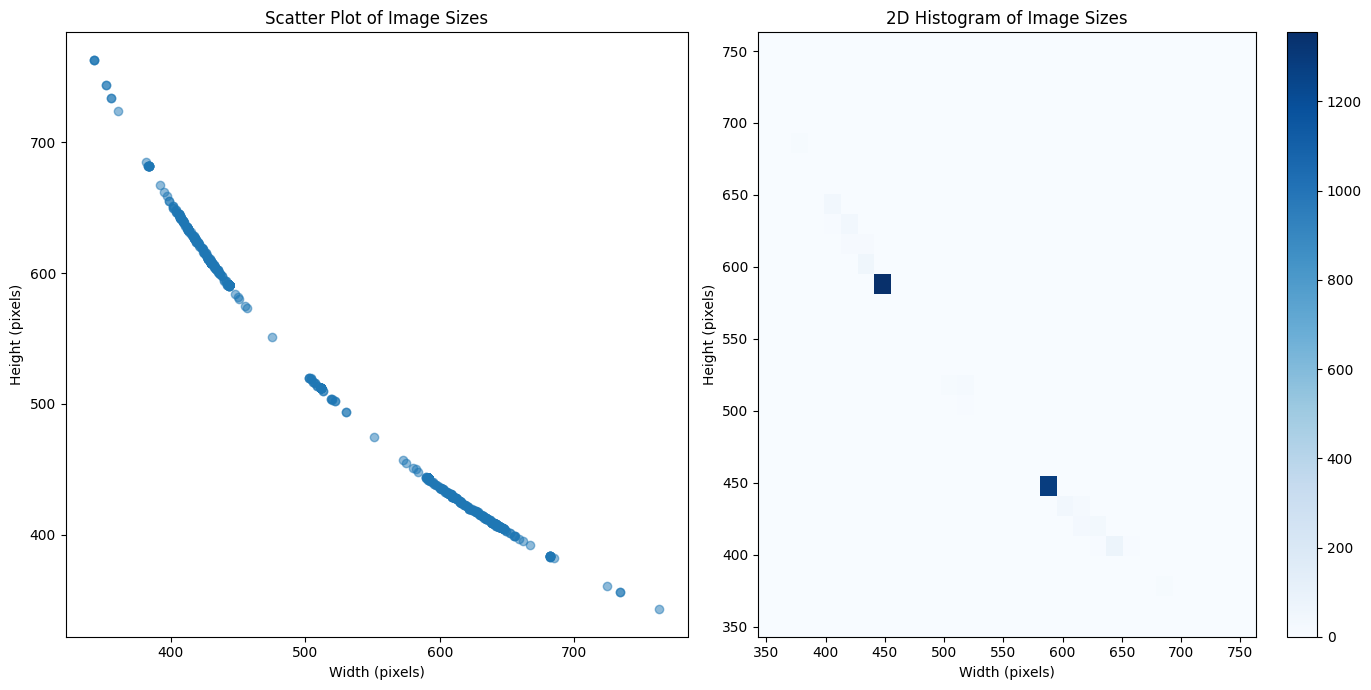


Image Width Distribution:
Width
343     3
352     2
356     2
361     1
382     1
       ..
682    11
685     1
724     1
734     2
763     1
Name: count, Length: 142, dtype: int64

Image Height Distribution:
Height
343    1
356    2
361    1
382    1
383    3
      ..
685    1
724    1
734    2
744    2
763    3
Name: count, Length: 142, dtype: int64


In [10]:
# test data 의 이미지 크기 확인

image_folder_path = '../data/test/'
    
# CSV 파일 경로
test_csv_path = '../data/sample_submission.csv'  # 예시 경로, 실제 경로로 수정 필요

# 이미지 크기 분석
image_sizes = analyze_image_sizes(test_csv_path, image_folder_path)

# 기본 통계 출력
print("Image Size Statistics:")
print(image_sizes.describe())

# 가장 큰 width, height, area를 가진 이미지 찾기
max_width_image = image_sizes.loc[image_sizes['Width'].idxmax()]
max_height_image = image_sizes.loc[image_sizes['Height'].idxmax()]
image_sizes['Area'] = image_sizes['Width'] * image_sizes['Height']
max_area_image = image_sizes.loc[image_sizes['Area'].idxmax()]

print("\nImage with the largest width:")
print(f"Width: {max_width_image['Width']} pixels, Height: {max_width_image['Height']} pixels")

print("\nImage with the largest height:")
print(f"Width: {max_height_image['Width']} pixels, Height: {max_height_image['Height']} pixels")

print("\nImage with the largest area:")
print(f"Width: {max_area_image['Width']} pixels, Height: {max_area_image['Height']} pixels")
print(f"Area: {max_area_image['Area']} square pixels")

# 이미지 크기 시각화
plt.figure(figsize=(14, 7))

# 산점도
plt.subplot(1, 2, 1)
plt.scatter(image_sizes['Width'], image_sizes['Height'], alpha=0.5)
plt.title('Scatter Plot of Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

# 히스토그램
plt.subplot(1, 2, 2)
plt.hist2d(image_sizes['Width'], image_sizes['Height'], bins=30, cmap='Blues')
plt.colorbar()
plt.title('2D Histogram of Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')

plt.tight_layout()
plt.show()

# 이미지 크기 분포 출력
print("\nImage Width Distribution:")
print(image_sizes['Width'].value_counts().sort_index())
print("\nImage Height Distribution:")
print(image_sizes['Height'].value_counts().sort_index())

## 이미지 사이즈를 같은 사이즈로 전처리.

In [14]:
import os
import cv2
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter, ImageOps
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_image_for_ocr(image_path, output_size, background_color=(255, 255, 255)):
    # 이미지 읽기 (PIL 사용)
    image = Image.open(image_path)
    
    # 리사이즈
    original_size = image.size
    ratio = min(output_size / original_size[0], output_size / original_size[1])
    new_size = tuple([int(x * ratio) for x in original_size])
    resized_image = image.resize(new_size, Image.BILINEAR)
    
    # 정사각형 백그라운드 이미지 생성 (백그라운드 컬러: 흰색)
    new_image = Image.new("RGB", (output_size, output_size), background_color)
    
    # 리사이즈된 이미지 중앙에 배치
    paste_position = ((output_size - new_size[0]) // 2, (output_size - new_size[1]) // 2)
    new_image.paste(resized_image, paste_position)
    
    # 이미지 대비 조정 및 샤프닝
    enhancer = ImageEnhance.Contrast(new_image)
    new_image = enhancer.enhance(1.2)  # 대비 약간 증가
    enhancer = ImageEnhance.Sharpness(new_image)
    new_image = enhancer.enhance(1.2)  # 선명도 약간 증가
    
    return new_image

def process_dataset(csv_path, input_folder, output_folder, output_size):
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)
    image_column = df.columns[0]  # 첫 번째 열을 이미지 파일명으로 가정
    
    # 출력 폴더 생성
    os.makedirs(output_folder, exist_ok=True)
    
    # 모든 이미지에 대해 전처리 적용
    for index, row in df.iterrows():
        image_file = row[image_column]
        input_path = os.path.join(input_folder, image_file)
        output_path = os.path.join(output_folder, image_file)  # 'preprocessed_' 접두사 제거
        
        try:
            # 전처리 함수 호출
            preprocessed_image = preprocess_image_for_ocr(input_path, output_size, background_color=(255, 255, 255))
            
            # 전처리된 이미지 저장
            preprocessed_image.save(output_path, 'JPEG', quality=95, optimize=True)
            print(f"Preprocessed: {image_file}")
        except Exception as e:
            print(f"Error processing {image_file}: {e}")
    
    print("Preprocessing completed.")

def analyze_image_sizes(folder_path):
    widths = []
    heights = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(folder_path, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                widths.append(width)
                heights.append(height)
    
    return pd.DataFrame({'Width': widths, 'Height': heights})


IMAGE_SIZE = 384
input_folder = '../data/train/'
output_folder = '../data/train_preprocessed/'
csv_path = '../data/train_correct_labeling.csv'

# 데이터셋 전처리
process_dataset(csv_path, input_folder, output_folder, IMAGE_SIZE)

Preprocessed: 002f99746285dfdd.jpg
Preprocessed: 008ccd231e1fea5d.jpg
Preprocessed: 008f5911bfda7695.jpg
Preprocessed: 009235e4c9c07af5.jpg
Preprocessed: 00b2f44967580c74.jpg
Preprocessed: 00cfa88ce8973dea.jpg
Preprocessed: 00ec594b7cc89183.jpg
Preprocessed: 00f59b12e9e08f29.jpg
Preprocessed: 00fdc02d9b552fe8.jpg
Preprocessed: 012913977fd1d980.jpg
Preprocessed: 0134204c33c8d37c.jpg
Preprocessed: 0143de5f1099427d.jpg
Preprocessed: 01af3d4c58c8530f.jpg
Preprocessed: 01c0b97e1492b220.jpg
Preprocessed: 024fe478044874ab.jpg
Preprocessed: 0250ee8107091ade.jpg
Preprocessed: 02533d35fe935981.jpg
Preprocessed: 026817f3f9434f5b.jpg
Preprocessed: 02ab86a5d5a979cc.jpg
Preprocessed: 02d404271e4965fa.jpg
Preprocessed: 02dad82a9420ae86.jpg
Preprocessed: 02e1538cef751c7d.jpg
Preprocessed: 02ebb92c43006832.jpg
Preprocessed: 03075ea3046d4459.jpg
Preprocessed: 03084c1b03921a99.jpg
Preprocessed: 03636653282bb56c.jpg
Preprocessed: 03648b6855b9f8c1.jpg
Preprocessed: 03ce6a0a86939c04.jpg
Preprocessed: 040073

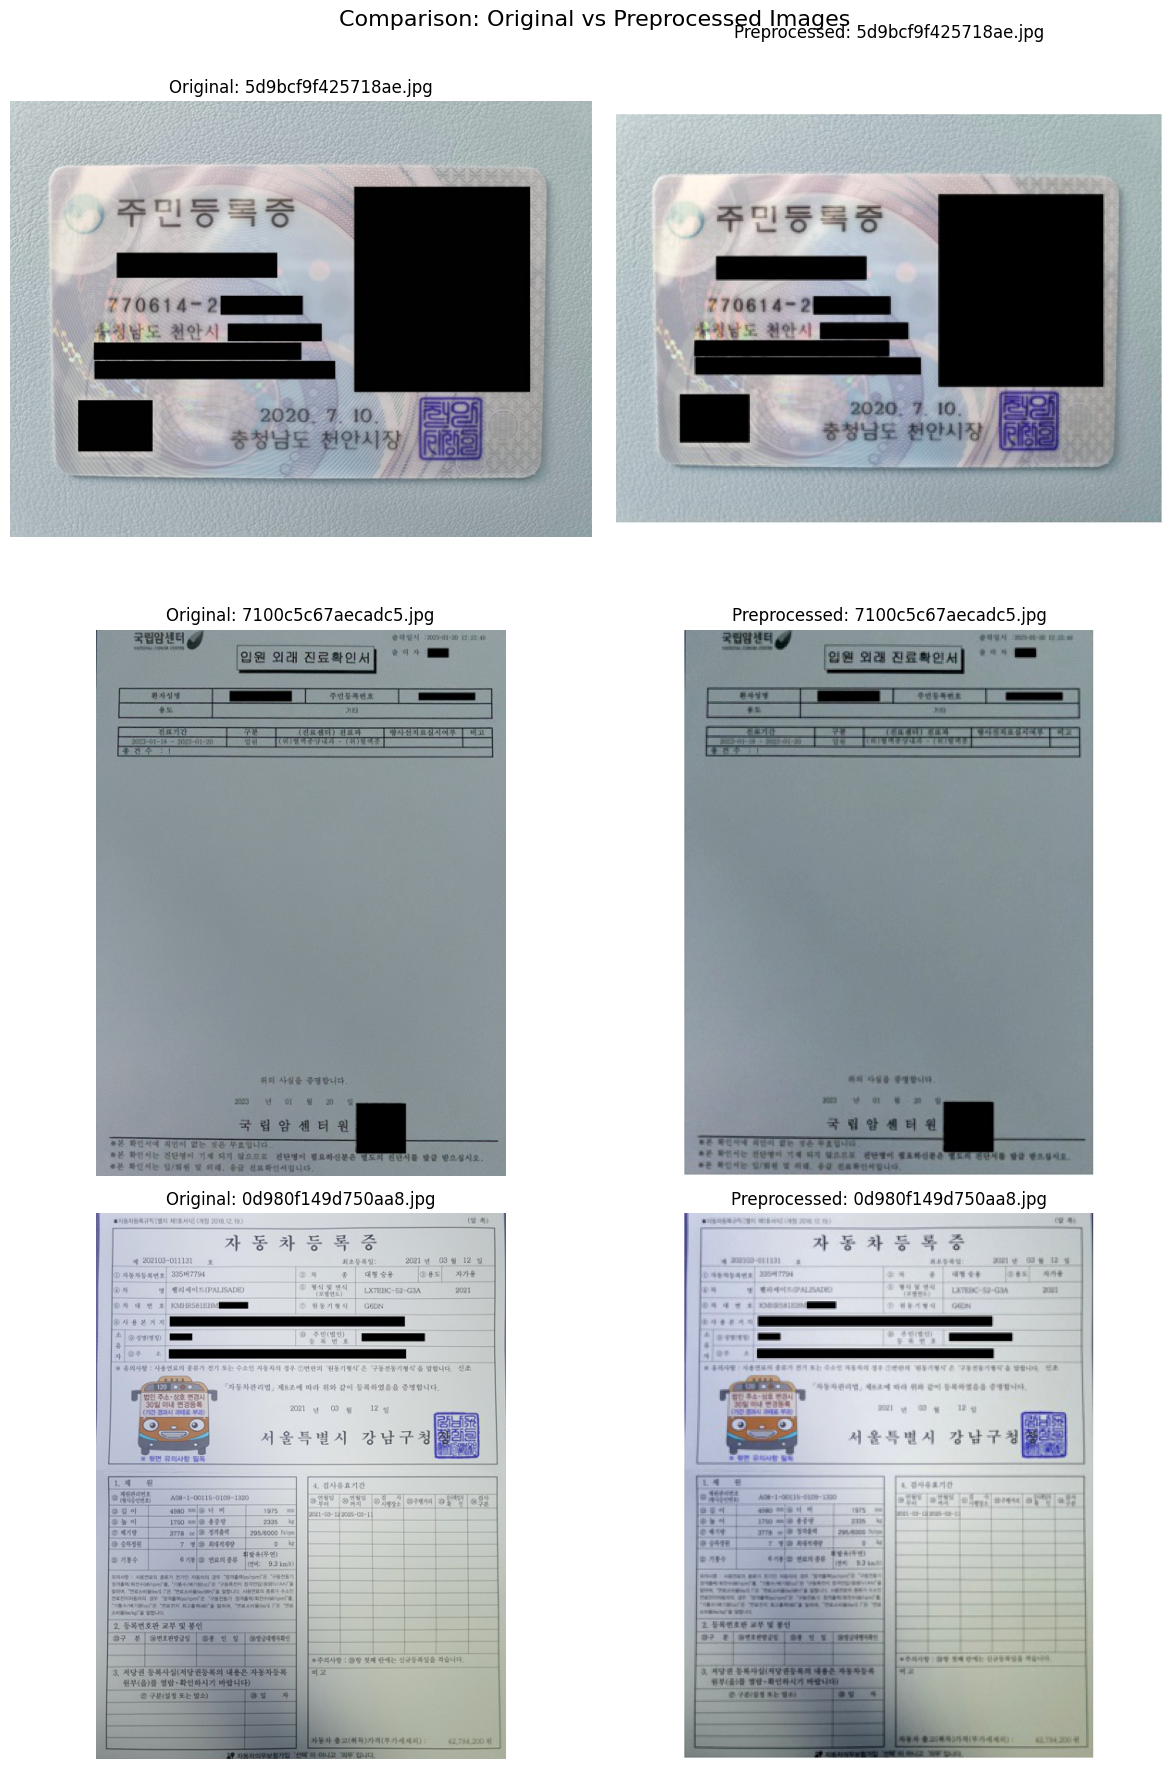

In [15]:
def compare_images(input_folder, output_folder, csv_path, n_samples=3):
    # CSV 파일 읽기
    df = pd.read_csv(csv_path)
    image_column = df.columns[0]  # 첫 번째 열을 이미지 파일명으로 가정
    
    # 랜덤하게 n_samples 개의 이미지 선택
    sample_images = random.sample(df[image_column].tolist(), n_samples)
    
    # 이미지 비교 및 시각화
    fig, axes = plt.subplots(n_samples, 2, figsize=(12, 6*n_samples))
    fig.suptitle("Comparison: Original vs Preprocessed Images", fontsize=16)
    
    for i, image_file in enumerate(sample_images):
        # 원본 이미지 로드
        original_path = os.path.join(input_folder, image_file)
        original_img = Image.open(original_path)
        
        # 전처리된 이미지 로드
        preprocessed_path = os.path.join(output_folder, image_file)  # 'preprocessed_' 접두사 제거
        preprocessed_img = Image.open(preprocessed_path)
        
        # 원본 이미지 표시
        axes[i, 0].imshow(original_img)
        axes[i, 0].set_title(f"Original: {image_file}")
        axes[i, 0].axis('off')
        
        # 전처리된 이미지 표시
        axes[i, 1].imshow(preprocessed_img)
        axes[i, 1].set_title(f"Preprocessed: {image_file}")
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()


compare_images(input_folder, output_folder, csv_path, n_samples=3)

## test data 전처리

In [16]:
IMAGE_SIZE = 384
input_folder = '../data/test/'
output_folder = '../data/test_preprocessed/'
csv_path = '../data/sample_submission.csv'

# 데이터셋 전처리
process_dataset(csv_path, input_folder, output_folder, IMAGE_SIZE)

Preprocessed: 0008fdb22ddce0ce.jpg
Preprocessed: 00091bffdffd83de.jpg
Preprocessed: 00396fbc1f6cc21d.jpg
Preprocessed: 00471f8038d9c4b6.jpg
Preprocessed: 00901f504008d884.jpg
Preprocessed: 009b22decbc7220c.jpg
Preprocessed: 00b33e0ee6d59427.jpg
Preprocessed: 00bbdcfbbdb3e131.jpg
Preprocessed: 00c03047e0fbef40.jpg
Preprocessed: 00c0dabb63ca7a16.jpg
Preprocessed: 00dcea90f63ad630.jpg
Preprocessed: 00e15da96484eb94.jpg
Preprocessed: 00f5784903a39fdd.jpg
Preprocessed: 0111a6728e9f8a73.jpg
Preprocessed: 0114a887a2c2e4ca.jpg
Preprocessed: 01385f22f2490868.jpg
Preprocessed: 0145dd3d1cd090ae.jpg
Preprocessed: 016240faa186d24d.jpg
Preprocessed: 016b0c00cdf93e0a.jpg
Preprocessed: 017ba667291b53c6.jpg
Preprocessed: 017e5da799e1637c.jpg
Preprocessed: 0182bffa56bdd844.jpg
Preprocessed: 019ed42bb4c2caa9.jpg
Preprocessed: 01bd84a54be54b8b.jpg
Preprocessed: 01c918594307c6f2.jpg
Preprocessed: 01ebd05a14e10618.jpg
Preprocessed: 020740b55bbc329e.jpg
Preprocessed: 021e7c8d9dc19021.jpg
Preprocessed: 0298c2

# 이미지 증강

In [12]:
import os
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm

def add_noise(image, noise_factor=0.3):
    img_array = np.array(image)
    noise = np.random.randn(*img_array.shape) * 255 * noise_factor
    noisy_img_array = np.clip(img_array + noise, 0, 255).astype(np.uint8)
    return Image.fromarray(noisy_img_array)

# 경로 설정
image_folder_path = '../data/train/'
output_folder_path = '../data/augmented_train/'
train_csv_path = '../data/train_correct_labeling.csv'
output_csv_path = '../data/augmented_train.csv'

# 출력 폴더가 없으면 생성
os.makedirs(output_folder_path, exist_ok=True)

# CSV 파일 읽기
df = pd.read_csv(train_csv_path)

print(f"원본 CSV 파일의 행 수: {len(df)}")
print(f"원본 CSV 파일의 열: {df.columns}")

# 열 이름이 'ID'인 경우 'id'로 변경
if 'ID' in df.columns:
    df = df.rename(columns={'ID': 'id'})

# 증강된 데이터를 저장할 새로운 데이터프레임 생성
new_rows = []

# 각 이미지에 대해 처리
for index, row in tqdm(df.iterrows(), total=len(df), desc="이미지 처리 중"):
    image_filename = row['id']
    target = row['target']
    
    # 이미지 열기
    image_path = os.path.join(image_folder_path, image_filename)
    try:
        # 원본 이미지 복사
        shutil.copy2(image_path, output_folder_path)
        
        with Image.open(image_path) as img:
            # 상하 반전
            flipped_ud_img = img.transpose(Image.FLIP_TOP_BOTTOM)
            new_filename_ud = f"up_down_{image_filename}"
            output_path_ud = os.path.join(output_folder_path, new_filename_ud)
            flipped_ud_img.save(output_path_ud)
            new_rows.append({'id': new_filename_ud, 'target': target})

            # 좌우 반전
            flipped_lr_img = img.transpose(Image.FLIP_LEFT_RIGHT)
            new_filename_lr = f"lrinverse_{image_filename}"
            output_path_lr = os.path.join(output_folder_path, new_filename_lr)
            flipped_lr_img.save(output_path_lr)
            new_rows.append({'id': new_filename_lr, 'target': target})

            # 45도 회전
            rotated_45_img = img.rotate(45, expand=True)
            new_filename_45 = f"45r_{image_filename}"
            output_path_45 = os.path.join(output_folder_path, new_filename_45)
            rotated_45_img.save(output_path_45)
            new_rows.append({'id': new_filename_45, 'target': target})

            # 135도 회전
            rotated_135_img = img.rotate(135, expand=True)
            new_filename_135 = f"135r_{image_filename}"
            output_path_135 = os.path.join(output_folder_path, new_filename_135)
            rotated_135_img.save(output_path_135)
            new_rows.append({'id': new_filename_135, 'target': target})

            # 노이즈 추가
            noisy_img = add_noise(img)
            new_filename_noise = f"noise_{image_filename}"
            output_path_noise = os.path.join(output_folder_path, new_filename_noise)
            noisy_img.save(output_path_noise)
            new_rows.append({'id': new_filename_noise, 'target': target})

    except Exception as e:
        print(f"\n이미지 처리 중 오류 발생: {image_filename}. 오류: {str(e)}")

# 새로운 행들을 데이터프레임으로 변환
new_df = pd.DataFrame(new_rows)

# 원본 데이터와 새로운 데이터를 합치기
augmented_df = pd.concat([df, new_df], ignore_index=True)

print(f"증강 후 데이터프레임의 행 수: {len(augmented_df)}")
print(f"증강 후 데이터프레임의 열: {augmented_df.columns}")

# 중복 제거 (필요한 경우)
augmented_df = augmented_df.drop_duplicates(subset='id', keep='first')

print(f"중복 제거 후 데이터프레임의 행 수: {len(augmented_df)}")

# 증강된 데이터를 포함한 새로운 CSV 파일 저장 (헤더 포함)
augmented_df.to_csv(output_csv_path, index=False)

print("\n이미지 증강 및 CSV 파일 업데이트가 완료되었습니다.")

원본 CSV 파일의 행 수: 1570
원본 CSV 파일의 열: Index(['ID', 'target'], dtype='object')


이미지 처리 중: 100%|██████████| 1570/1570 [01:33<00:00, 16.80it/s]

증강 후 데이터프레임의 행 수: 9420
증강 후 데이터프레임의 열: Index(['id', 'target'], dtype='object')
중복 제거 후 데이터프레임의 행 수: 9420

이미지 증강 및 CSV 파일 업데이트가 완료되었습니다.
